<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_49_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST with RandomForest

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
X_train.shape, Y_class_test.shape

((60000, 28, 28), (10000,))

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train.reshape(X_train.shape[0], 28*28), Y_class_train)
rfc.score(X_test.reshape(X_test.shape[0], 28*28), Y_class_test)

0.9685

## MNIST with Tensorflow 2.0 (version 1)

- from internet
- Multi-class logistic regression (simple MLP without hidden layer)




In [4]:
# step 1: importing modules

import tensorflow as tf
import numpy as np

In [10]:
# step 2: loading and preparing mnist dataset

from tensorflow.keras.datasets import mnist
num_classes = 10        # 0 to 9 digits
num_features = 28 * 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [12]:
# step 3: setting up hyperparameters and dataset parameters

learning_rate = 0.01
training_steps = 4000
batch_size = 32

In [13]:
# step 4: shuffling and batching the dataset

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))
# train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)
train_data=train_data.repeat().shuffle(5000).batch(batch_size)

In [14]:
train_data

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.uint8)>

In [15]:
# step 5: initializing weights and biases

W = tf.Variable(tf.random.normal([num_features, num_classes]), name="weight") # (784,10)
b = tf.Variable(tf.random.normal([num_classes]), name="bias")                # (10,)
W.shape, b.shape

(TensorShape([784, 10]), TensorShape([10]))

In [16]:
# step 6: defining logistic regression and cost function

def logistic_regression(x):
    # print(x.shape)    # (batch_size,784)
    return tf.nn.softmax(tf.matmul(x, W) + b)

In [17]:
# for exercise
tf.nn.softmax([1.,1.,0.,0.])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.36552927, 0.36552927, 0.13447072, 0.13447072], dtype=float32)>

In [18]:
def cross_entropy(y_pred, y_true):
    # print(y_pred.shape, y_true.shape)   # (batch_size, 10) (batch_size,)
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)  # to avoid log(0) error
    ce1 = tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))
    ce0 = tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))       # wrong
    ce2 = tf.reduce_mean(tf.losses.categorical_crossentropy(y_true, y_pred)) # function
    return ce1

In [19]:
# for exercise
tmp_a = tf.constant([[1.,2.],[3.,4.]])
tmp_b = tf.constant([[0.,2.],[4.,6.]])
tmp_a*tmp_b, tf.reduce_sum(tmp_a*tmp_b, axis=1)

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 0.,  4.],
        [12., 24.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 4., 36.], dtype=float32)>)

In [20]:
# step 7: defining optimizers and accuracy metrics

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64)) # axis=1
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam(learning_rate)

In [21]:
# step 8: optimization process and updating weights and biases

def run_optimization(x, y):
    
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss = cross_entropy(y_pred, y)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))  # updates

In [22]:
# step 9: the training loop
# dataset.take(c): Creates a Dataset with at most c elements from this dataset.
# batch_size 만큼씩  c 번 뽑는다.

lossHistory = []
accuracyHistory = []
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # print(batch_x.shape, batch_y.shape)   # (batch_size,784), (batch_size,)
    run_optimization(batch_x, batch_y)

    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        lossHistory.append(loss)
        acc = accuracy(pred, batch_y)
        accuracyHistory.append(acc)
        # print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

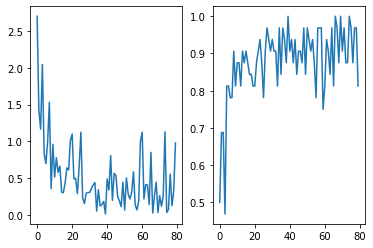

In [23]:
plt.subplot(1,2,1)
plt.plot(lossHistory)
plt.subplot(1,2,2)
plt.plot(accuracyHistory)

In [24]:
# step 10: testing model accuracy using the test data

pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.903100


model prediction: 7
model prediction: 2
model prediction: 1
model prediction: 0
model prediction: 4


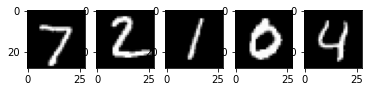

In [25]:
# step 11: visualizing the classification result

import matplotlib.pyplot as plt

n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.subplot(1,n_images, i+1)
    plt.imshow(np.reshape(test_images[i], [28,28]), cmap='gray')
    print('model prediction: %i' %np.argmax(predictions.numpy()[i]))
plt.show()

## MNIST with tensorflow 2.0 (version 2)

- all in one code routine (for easy migration from the simpler regression code)
- my version (no hidden layer)

In [26]:
from tensorflow.keras.datasets import mnist
num_classes = 10        # 0 to 9 digits
num_features = 28 * 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

In [27]:
# hyperparameters
input_size = 784
num_classes = 10
batch_size = 32
num_epochs = 10
learning_rate = 0.01

In [28]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data=train_data.shuffle(5000).batch(batch_size)

In [29]:
W = tf.Variable(tf.random.normal([input_size, num_classes])) # (784,10)
b = tf.Variable(tf.random.normal([num_classes]))             # (10,)

In [30]:
# Training
lossHistory = []
accuracyHistory = []

for e in range( num_epochs ):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        with tf.GradientTape() as tape:
            y_pred = tf.nn.softmax(tf.matmul(batch_x, W) + b)
            y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
            batch_y_ohe = tf.one_hot(batch_y, depth = 10)
            loss = tf.reduce_mean(tf.losses.categorical_crossentropy( batch_y_ohe , y_pred ))
            # loss = tf.reduce_mean(-tf.reduce_sum(batch_y * tf.math.log(y_pred), axis=1))

        grads = tape.gradient(loss, [W, b])
        optimizer = tf.optimizers.Adam( learning_rate )
        # Adam 과 SGD 비교해 보면 좋음.
        optimizer.apply_gradients(zip(grads, [W,b]))

        corr_predict = tf.equal(tf.argmax(y_pred, 1), tf.cast(batch_y, tf.int64))
        acc = tf.reduce_mean(tf.cast(corr_predict, tf.float32))

        if step % 50 == 0:
            pred = logistic_regression(batch_x)
            loss = cross_entropy(pred, batch_y)
            lossHistory.append(loss)
            acc = accuracy(pred, batch_y)
            accuracyHistory.append(acc)
            print("epoch: %i, step: %i, loss: %f, acc: %f" % (e, step, loss, acc))
    
    # print("epoch: %i, loss: %f, accuracy: %f" % (e, loss, acc))

# Testing
test_y_pred = tf.nn.softmax(tf.matmul(x_test, W) + b)
test_pred = tf.equal(tf.argmax(test_y_pred, 1), tf.cast(y_test, tf.int64))
test_acc = tf.reduce_mean(tf.cast(test_pred, tf.float32))

print("Test accuracy: %f" % test_acc)

epoch: 0, step: 50, loss: 2.907262, acc: 0.500000
epoch: 0, step: 100, loss: 2.923770, acc: 0.656250
epoch: 0, step: 150, loss: 1.409613, acc: 0.718750
epoch: 0, step: 200, loss: 0.306206, acc: 0.906250
epoch: 0, step: 250, loss: 0.989211, acc: 0.906250
epoch: 0, step: 300, loss: 0.409016, acc: 0.937500
epoch: 0, step: 350, loss: 0.699370, acc: 0.906250
epoch: 0, step: 400, loss: 0.608937, acc: 0.843750
epoch: 0, step: 450, loss: 2.143324, acc: 0.656250
epoch: 0, step: 500, loss: 0.689398, acc: 0.906250
epoch: 0, step: 550, loss: 0.499137, acc: 0.906250
epoch: 0, step: 600, loss: 0.666303, acc: 0.906250
epoch: 0, step: 650, loss: 0.684183, acc: 0.937500
epoch: 0, step: 700, loss: 0.801143, acc: 0.875000
epoch: 0, step: 750, loss: 0.561745, acc: 0.781250
epoch: 0, step: 800, loss: 1.267463, acc: 0.875000
epoch: 0, step: 850, loss: 0.781513, acc: 0.937500
epoch: 0, step: 900, loss: 2.147048, acc: 0.843750
epoch: 0, step: 950, loss: 0.744243, acc: 0.875000
epoch: 0, step: 1000, loss: 0.92

epoch: 4, step: 650, loss: 0.300492, acc: 0.937500
epoch: 4, step: 700, loss: 0.012385, acc: 1.000000
epoch: 4, step: 750, loss: 0.154333, acc: 0.968750
epoch: 4, step: 800, loss: 0.653398, acc: 0.968750
epoch: 4, step: 850, loss: 0.677583, acc: 0.968750
epoch: 4, step: 900, loss: 0.423775, acc: 0.937500
epoch: 4, step: 950, loss: 0.651740, acc: 0.968750
epoch: 4, step: 1000, loss: 1.173324, acc: 0.875000
epoch: 4, step: 1050, loss: 1.297155, acc: 0.937500
epoch: 4, step: 1100, loss: 0.664179, acc: 0.968750
epoch: 4, step: 1150, loss: 0.313888, acc: 0.937500
epoch: 4, step: 1200, loss: 0.076973, acc: 0.968750
epoch: 4, step: 1250, loss: 0.696871, acc: 0.875000
epoch: 4, step: 1300, loss: 1.298735, acc: 0.937500
epoch: 4, step: 1350, loss: 1.736091, acc: 0.875000
epoch: 4, step: 1400, loss: 0.858243, acc: 0.906250
epoch: 4, step: 1450, loss: 0.585594, acc: 0.875000
epoch: 4, step: 1500, loss: 0.863721, acc: 0.906250
epoch: 4, step: 1550, loss: 1.249007, acc: 0.906250
epoch: 4, step: 160

epoch: 8, step: 1250, loss: 1.437927, acc: 0.906250
epoch: 8, step: 1300, loss: 0.287868, acc: 0.937500
epoch: 8, step: 1350, loss: 0.061347, acc: 0.968750
epoch: 8, step: 1400, loss: 1.107275, acc: 0.906250
epoch: 8, step: 1450, loss: 0.703669, acc: 0.906250
epoch: 8, step: 1500, loss: 1.350988, acc: 0.875000
epoch: 8, step: 1550, loss: 1.441935, acc: 0.906250
epoch: 8, step: 1600, loss: 0.694868, acc: 0.843750
epoch: 8, step: 1650, loss: 0.000978, acc: 1.000000
epoch: 8, step: 1700, loss: 0.412985, acc: 0.906250
epoch: 8, step: 1750, loss: 0.429749, acc: 0.937500
epoch: 8, step: 1800, loss: 0.685884, acc: 0.875000
epoch: 8, step: 1850, loss: 0.731525, acc: 0.937500
epoch: 9, step: 50, loss: 0.000428, acc: 1.000000
epoch: 9, step: 100, loss: 1.280735, acc: 0.937500
epoch: 9, step: 150, loss: 0.011708, acc: 1.000000
epoch: 9, step: 200, loss: 0.915974, acc: 0.937500
epoch: 9, step: 250, loss: 0.683105, acc: 0.906250
epoch: 9, step: 300, loss: 0.896442, acc: 0.937500
epoch: 9, step: 350

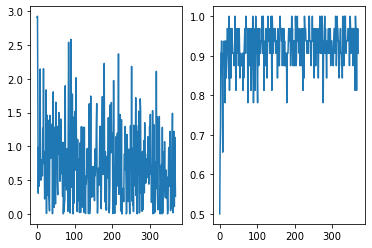

In [31]:
plt.subplot(1,2,1)
plt.plot(lossHistory)
plt.subplot(1,2,2)
plt.plot(accuracyHistory)

## MNIST tensorflow 2.0 (version 3)

- function define

epoch: 0, step: 50, loss: 2.445663, acc: 0.590000
epoch: 0, step: 100, loss: 1.200333, acc: 0.790000
epoch: 0, step: 150, loss: 1.159745, acc: 0.813333
epoch: 0, step: 200, loss: 0.617782, acc: 0.860000
epoch: 1, step: 50, loss: 0.579223, acc: 0.870000
epoch: 1, step: 100, loss: 0.686740, acc: 0.856667
epoch: 1, step: 150, loss: 0.461916, acc: 0.890000
epoch: 1, step: 200, loss: 0.532660, acc: 0.863333
epoch: 2, step: 50, loss: 0.368220, acc: 0.896667
epoch: 2, step: 100, loss: 0.526579, acc: 0.876667
epoch: 2, step: 150, loss: 0.502630, acc: 0.883333
epoch: 2, step: 200, loss: 0.481341, acc: 0.903333
epoch: 3, step: 50, loss: 0.382493, acc: 0.920000
epoch: 3, step: 100, loss: 0.389219, acc: 0.893333
epoch: 3, step: 150, loss: 0.419299, acc: 0.886667
epoch: 3, step: 200, loss: 0.303913, acc: 0.920000
epoch: 4, step: 50, loss: 0.406405, acc: 0.896667
epoch: 4, step: 100, loss: 0.321929, acc: 0.903333
epoch: 4, step: 150, loss: 0.465512, acc: 0.886667
epoch: 4, step: 200, loss: 0.358412,

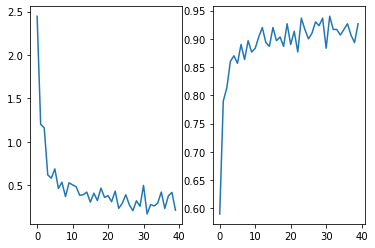

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
num_classes = 10        # 0 to 9 digits
num_features = 28 * 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

input_size = 784
num_classes = 10
batch_size = 300
num_epochs = 10
learning_rate = 0.01

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data=train_data.shuffle(5000).batch(batch_size)

W = tf.Variable(tf.random.normal([input_size, num_classes])) # (784,10)
b = tf.Variable(tf.random.normal([num_classes]))             # (10,)

def model(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

def loss_fn(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    y_true_ohe = tf.one_hot(batch_y, depth = 10)
    return tf.reduce_mean(tf.losses.categorical_crossentropy(y_true_ohe, y_pred))

optimizer = tf.optimizers.Adam( learning_rate )

def train_step (x, y):

    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = loss_fn (y_pred, y)
    grads = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(grads, [W,b]))

def accuracy(y_pred, y_true):
    corr_predict = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(corr_predict, tf.float32))

# Training
lossHistory = []
accuracyHistory = []

for e in range( num_epochs ):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        with tf.GradientTape() as tape:
            train_step(batch_x, batch_y)

        if step % 50 == 0: 
            pred = model(batch_x)
            loss = loss_fn (pred, batch_y)
            acc = accuracy(pred, batch_y)
            print("epoch: %i, step: %i, loss: %f, acc: %f" % (e, step, loss, acc))
            lossHistory.append(loss)
            accuracyHistory.append(acc)

# Testing
test_y_pred = model(x_test)
test_acc = accuracy(test_y_pred, y_test)
print("Test accuracy: %f" % test_acc)

plt.subplot(1,2,1)
plt.plot(lossHistory)
plt.subplot(1,2,2)
plt.plot(accuracyHistory)
plt.show()